### Question: how many divorces are to be expected for 2016 and 2017 ?

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startmodskl import *
from Starts.startvis import *
%matplotlib inline
rcParams['figure.figsize'] = 15, 6
divorces_1950_2015 = pd.read_csv('./data/divorces_1950_2015.csv')
divorces_1950_2015.set_index('Jahr', inplace=True)

local_kwargs {'data_path': './data/marriages_1950_2015.csv, ./data/marriages_groupby_age2015.csv, ./data/marriages_groupby_de_1994_2015.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
divorces_1950_2015.head()

,Ehescheidungen
Jahr,
1950,84674
1951,63973
1952,57929
1953,53872
1954,50665


### 1. Linear Regression

In [3]:
# from pandas import Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = divorces_1950_2015['Ehescheidungen'].values

/usr/local/lib64/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
len(X[0:len(X)-5])+ len(X[len(X)-5:])
X[1:len(X)-5]

array([ 63973,  57929,  53872,  50665,  48275,  46101,  46352,  48048,
        48846,  48873,  49271,  49514,  50840,  55708,  58721,  58715,
        62827,  65234,  72300,  76520,  80444,  86614,  90164,  98584,
       106829, 108258,  74658,  32462,  79490,  96222, 109520, 118483,
       121317, 130744, 128124, 122443, 129850, 128729, 126628, 122869,
       136317, 135010, 156425, 166052, 169425, 175550, 187802, 192416,
       190590, 194408, 197498, 204214, 213975, 213691, 201693, 190928,
       187072, 191948, 185817, 187027])

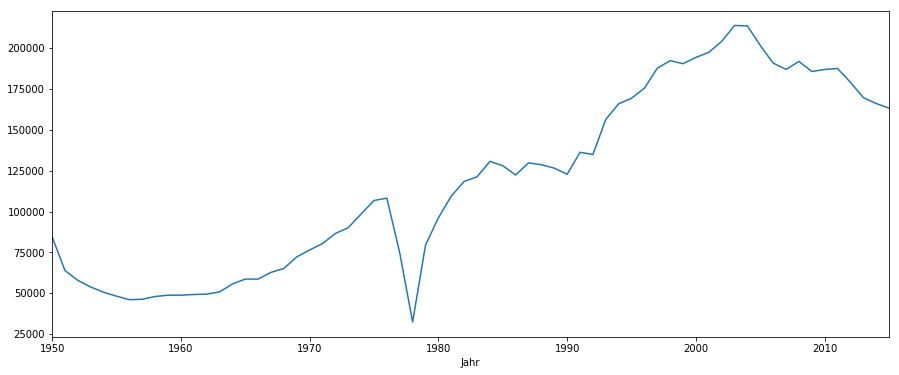

In [5]:
divorces_1950_2015['Ehescheidungen'].plot()

In [6]:
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
X_train = divorces_1950_2015['Ehescheidungen'].index
y_train = divorces_1950_2015['Ehescheidungen'].values
reg_lin.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
X_test_true = divorces_1950_2015['Ehescheidungen'].index[60:66]
y_true = divorces_1950_2015['Ehescheidungen'].values[60:66]
X_test_true, y_true

(Int64Index([2010, 2011, 2012, 2013, 2014, 2015], dtype='int64', name='Jahr'),
 array([187027, 187640, 179147, 169833, 166199, 163335]))

In [8]:
y_pred_lin = reg_lin.predict(X_test_true.values.reshape(-1,1))
y_pred_lin, y_true

(array([ 193684.70712869,  196411.69813172,  199138.68913474,
         201865.68013777,  204592.6711408 ,  207319.66214383]),
 array([187027, 187640, 179147, 169833, 166199, 163335]))

In [9]:
print(mean_squared_error(y_true, y_pred_lin))


825958745.195


In [10]:
# predict in year 2016, 2017
X_pred = np.array([[2016], [2017]])
y_pred = reg_lin.predict(X_pred)
y_pred

array([ 210046.65314685,  212773.64414988])

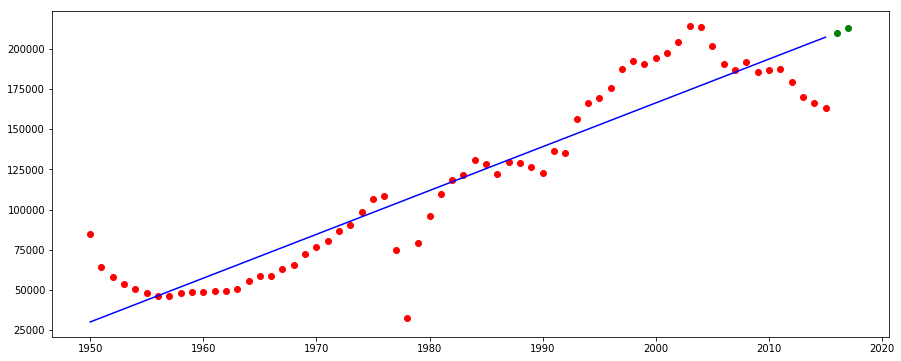

In [11]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred, color='green')
plt.plot(X_train.values, reg_lin.predict(X_train.values.reshape(-1,1)), color = 'blue')

### 2. Decision Tree Regression

In [12]:
reg_dt = DecisionTreeRegressor(random_state=0)
reg_dt.fit(X_train.values.reshape(-1,1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [13]:
y_pred_dt = reg_dt.predict(X_test_true.values.reshape(-1,1))
y_pred_dt, y_true

(array([ 187027.,  187640.,  179147.,  169833.,  166199.,  163335.]),
 array([187027, 187640, 179147, 169833, 166199, 163335]))

In [14]:
print(mean_squared_error(y_true, y_pred_dt))  # Overfitting ?

0.0


In [15]:
# Result
y_pred2 = reg_dt.predict(X_pred)
y_pred2

array([ 163335.,  163335.])

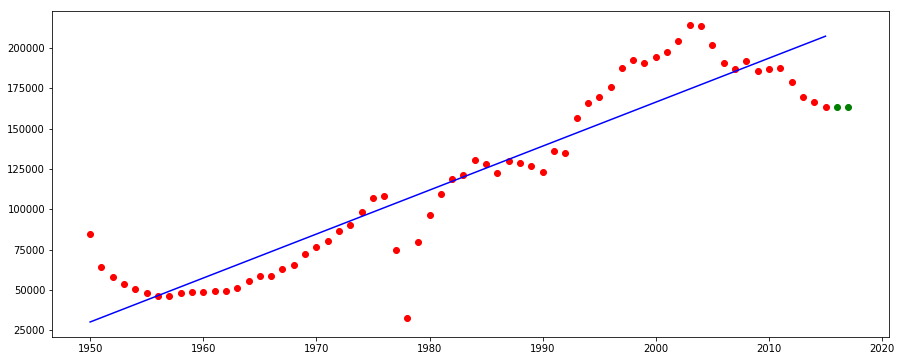

In [16]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred2, color='green')
plt.plot(X_train.values, reg_lin.predict(X_train.values.reshape(-1,1)), color = 'blue')

### 3. Random Forest

In [17]:
reg_rf = RandomForestRegressor(n_estimators=10, random_state=0)
reg_rf.fit(X_train.values.reshape(-1,1), y_train)
reg_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
y_pred_rf = reg_rf.predict(X_test_true.values.reshape(-1,1))
y_pred_rf, y_true

(array([ 186785. ,  186545.5,  180763.5,  170401. ,  167289.2,  165493.8]),
 array([187027, 187640, 179147, 169833, 166199, 163335]))

In [19]:
print(mean_squared_error(y_true, y_pred_rf))  # error too large

1673523.99667


In [20]:
# Result and comparing with the above results
y_pred3 = reg_rf.predict(X_pred)
y_pred3, y_pred2, y_pred

(array([ 165493.8,  165493.8]),
 array([ 163335.,  163335.]),
 array([ 210046.65314685,  212773.64414988]))

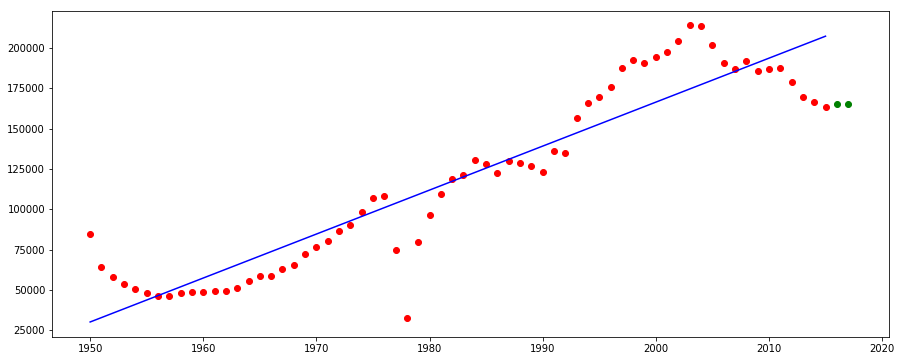

In [21]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred3, color='green')
plt.plot(X_train.values, reg_lin.predict(X_train.values.reshape(-1,1)), color = 'blue')

### Final Result by computing the mean value of all 3 above results 

### (linear regression, decision tree, random forest)

In [22]:
y_pred_mean_2016 = np.mean([y_pred3[0], y_pred2[0], y_pred[0]])
y_pred_mean_2017 = np.mean([y_pred3[1], y_pred2[1], y_pred[1]])
y_pred_final = [y_pred_mean_2016, y_pred_mean_2017]
y_pred_final

[179625.15104895062, 180534.14804995968]

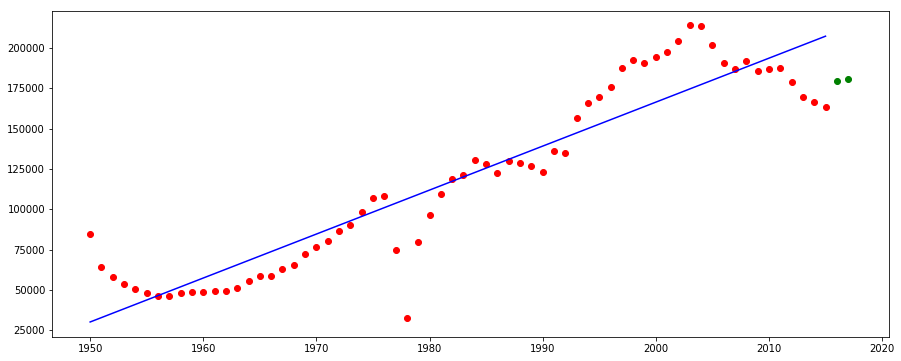

In [23]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred_final, color='green')
plt.plot(X_train.values, reg_lin.predict(X_train.values.reshape(-1,1)), color = 'blue')

In [24]:
# StartMod.validation(reg_lin, X_train.values.reshape(-1,1), y_train)
# StartMod.validation(reg_dt, X_train.values.reshape(-1,1), y_train)
# StartMod.validation(reg_rf, X_train.values.reshape(-1,1), y_train)